# EXPLORATORY DATA ANALYSIS PIPELINE

Here is an example of an exploratory data analysis pipeline for continuous and categorical values using python

<b>1. Import libraries</b>: Start by importing the necessary libraries such as pandas, numpy, matplotlib, seaborn, scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>2. Load the data</b>: Use the pandas library to load the data into a Dataframe

In [5]:
data = pd.read_csv('covid_data.csv')

<b>3. Explore the data</b>: Use head and info functions to have a quick overview of the data

In [6]:
print(data.head())
print(data.info())

      location        date  new_cases  new_deaths  population  \
0  Afghanistan  2019-12-31          0           0  38928341.0   
1  Afghanistan  2020-01-01          0           0  38928341.0   
2  Afghanistan  2020-01-02          0           0  38928341.0   
3  Afghanistan  2020-01-03          0           0  38928341.0   
4  Afghanistan  2020-01-04          0           0  38928341.0   

   aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
0                  2.581        1803.987                         0.5  
1                  2.581        1803.987                         0.5  
2                  2.581        1803.987                         0.5  
3                  2.581        1803.987                         0.5  
4                  2.581        1803.987                         0.5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------       

<b>4. Handling missing values</b>: Check for missing values and handle them accordingly. This can be done by either dropping the missing values or filling them with a suitable value.

In [7]:
data.isnull().sum()
data = data.dropna()

<b>5. Exploring continuous variables</b>: Use histograms, boxplots, and scatter plots to visualize the distribution of the continuous variables.

In [12]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

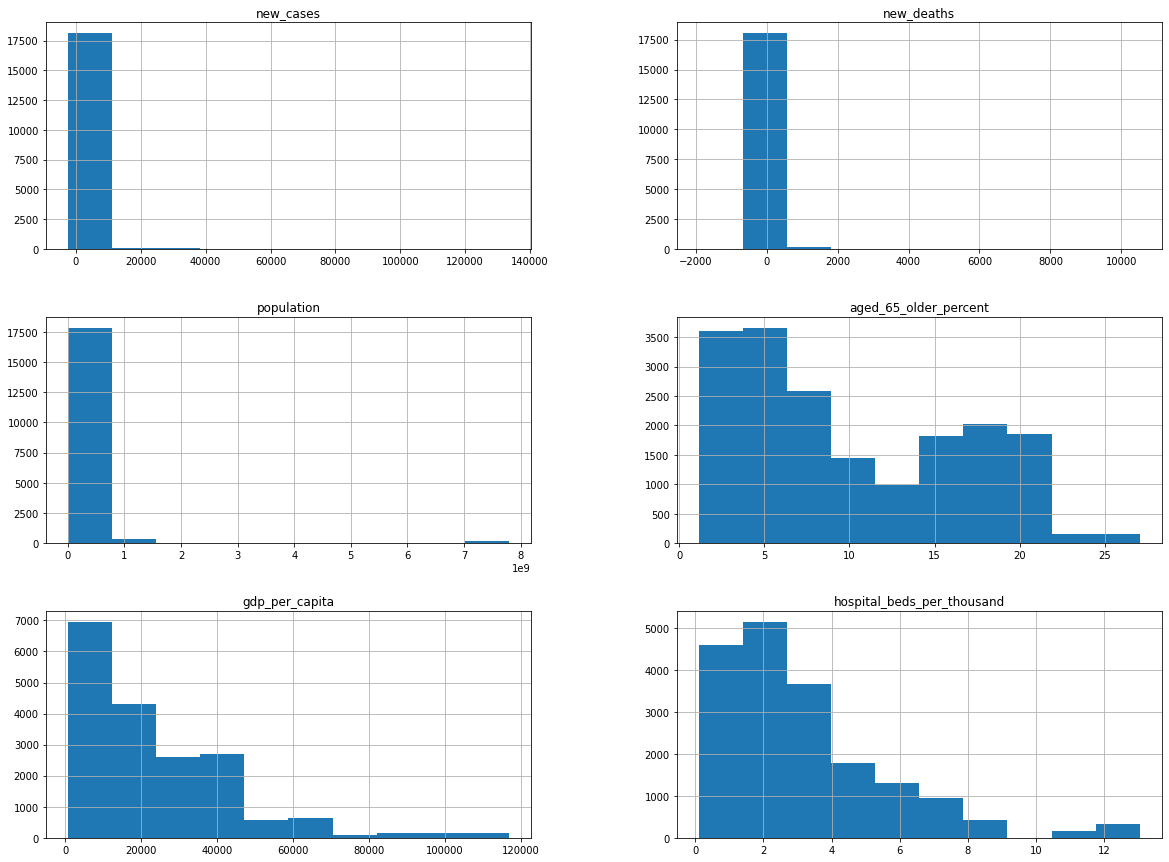

In [16]:
data[num_cols].hist(bins=10, figsize=(20,15))
# sns.boxplot(data=data[num_cols])
# sns.pairplot(data)

plt.show()

<b>6. Exploring categorical variables</b>: Use bar plots, count plots, and pie charts to visualize the distribution of the categorical variables.

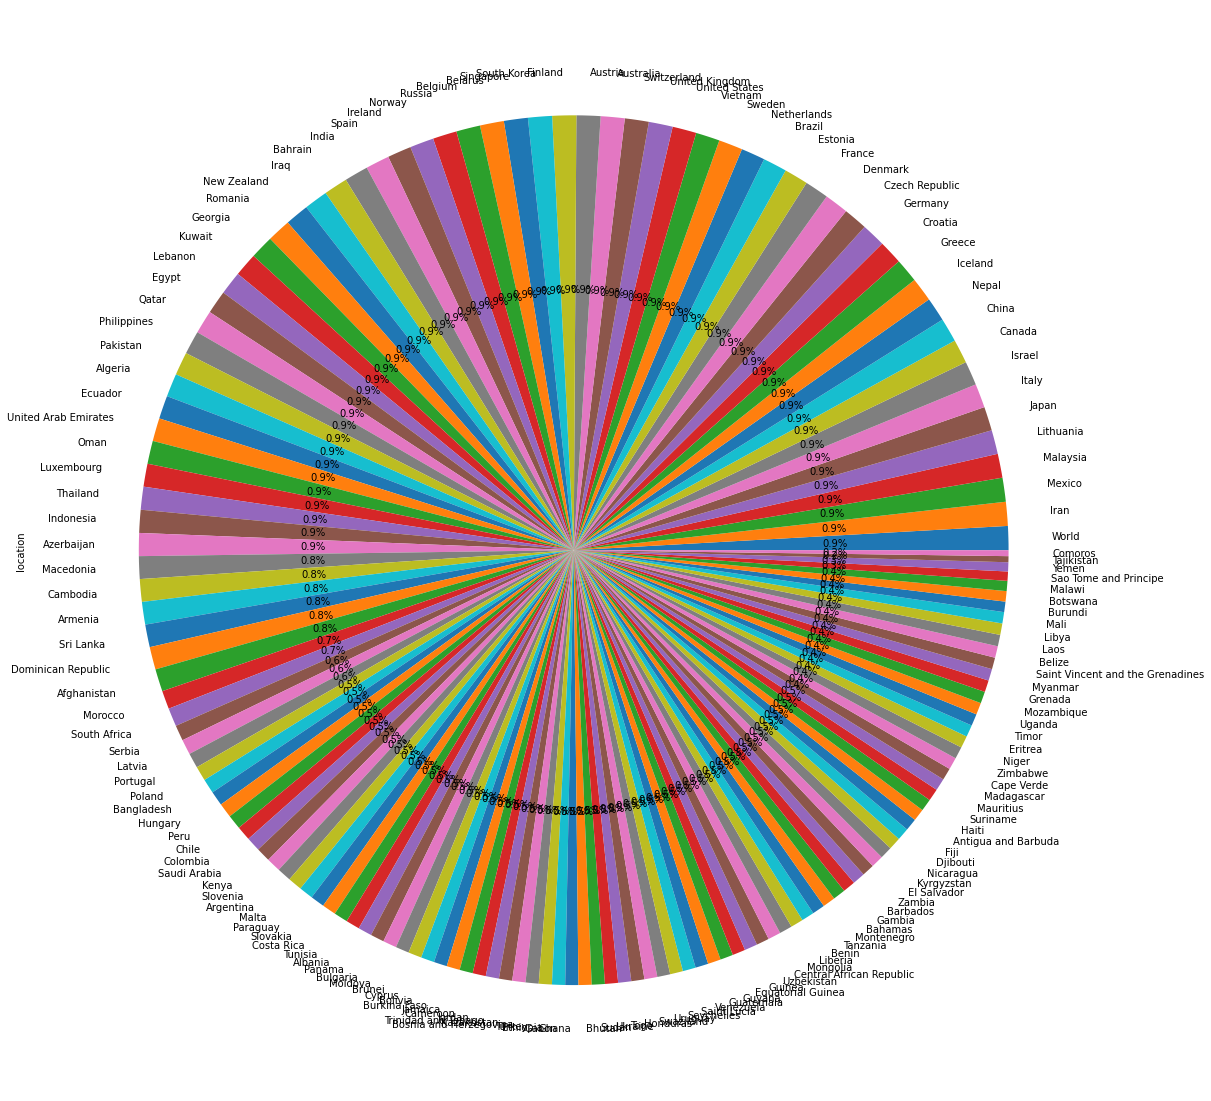

In [33]:
# data.select_dtypes(include='object').columns
plt.figure(figsize=(20, 20))
us_data = data[data['location'] == 'United States']
# sns.countplot(x='location', data=us_data[cat_cols])
# sns.barplot(x='categorical_column', y='continuous_column', data=data)
data['location'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

<b>7. Checking for outliers</b>: Use the Z-score method to check for outliers in the continuous variables.

from scipy import stats
z = np.abs(stats.zscore(data[num_cols]))
threshold = 3
outliers = np.where(z > threshold)
data = data[(z < threshold).all(axis=1)]

<b>8. Creating new features</b>: Create new features by combining existing variables or generating new variables derived from the existing variables.

In [37]:
# data['new_feature'] = data['column1'] + data['column2']
# data['new_feature'] = data['column1'].apply(lambda x: x**2)


<b>9. Saving the cleaned data</b>: Save the cleaned data in a new file for further analysis.

In [38]:
# data.to_csv('cleaned_data.csv', index=False)

# Correlation

To show the correlation of continuous values in a dataset, you can use the corr() function in pandas. This function calculates the Pearson correlation coefficient between all pairs of continuous variables in a DataFrame. Here is an example of how to use it:

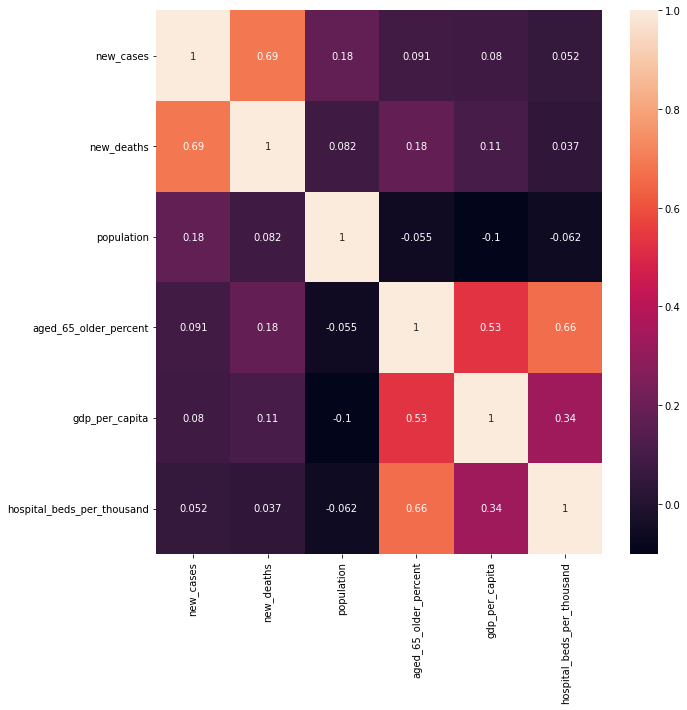

In [41]:
# data = pd.read_csv('path_to_data.csv')
plt.figure(figsize=(10, 10))
# Calculate the correlation matrix
corr = data[num_cols].corr()

# Plot the correlation matrix using seaborn
sns.heatmap(corr, annot=True)
plt.show()

This will create a heatmap of the correlation matrix, where the color of each cell represents the correlation coefficient (ranging from -1 to 1) between the corresponding variables. The darker the color, the stronger the correlation. The annot parameter controls whether the correlation coefficients are displayed in the cells.

You could also use the pairplot function which is another way to visualize the correlation between multiple variables.

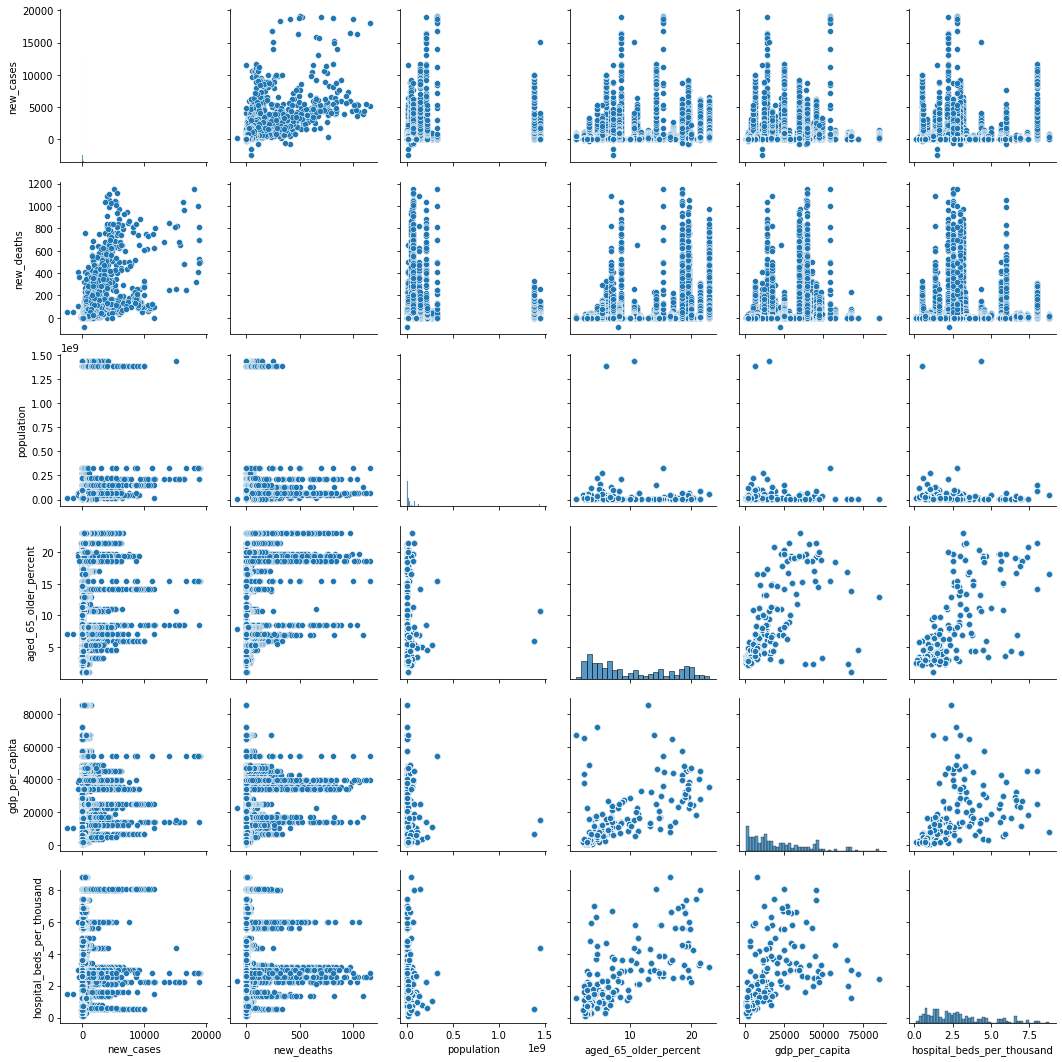

In [42]:
sns.pairplot(data[num_cols])
plt.show()

This will create a scatter plot matrix, where each pair of variables is plotted on a separate subplot. The diagonal subplots show the histograms of the corresponding variable. This is a useful way to quickly visualize the relationships between multiple variables at once.

You could also use other correlation coefficient such as Kendall or Spearman by passing it to the corr() function or Pairplot function.

In [43]:
corr = data[num_cols].corr(method='kendall')

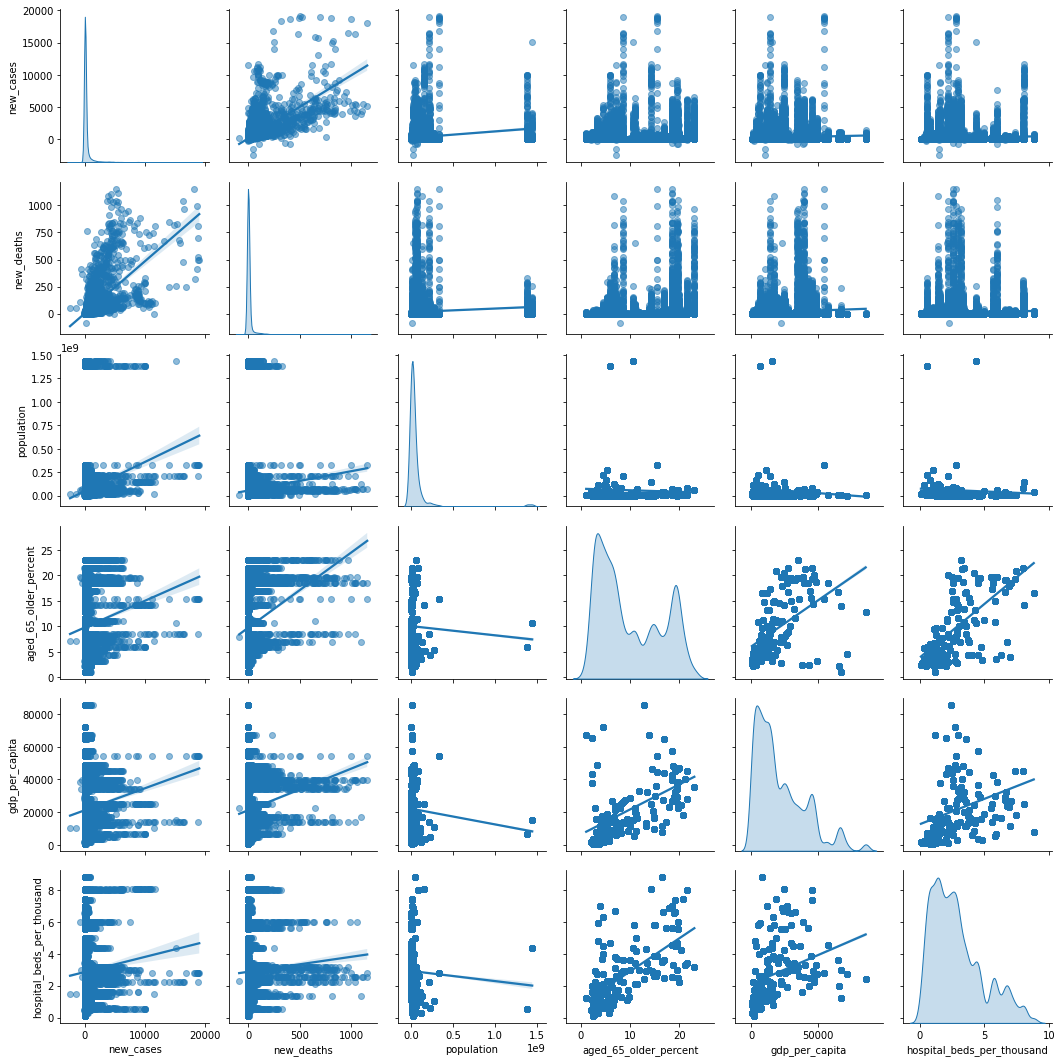

In [44]:
sns.pairplot(data[num_cols], 
             kind='reg', 
             diag_kind='kde', 
             diag_kws={'shade': True}, 
             plot_kws={'scatter_kws': {'alpha': 0.5}})

One way to visualize outliers in a box plot is to use the boxplot() function in matplotlib or seaborn. This function creates a box plot of a given dataset, where the box represents the interquartile range (IQR) and the whiskers represent the minimum and maximum values within 1.5 times the IQR. Any data points outside of this range are considered outliers and are plotted as individual points. Here's an example of how to use this function:

Another way to visualize outliers is by using scatter plots, which can be created using the scatter() function in matplotlib. You can use this function to create a scatter plot of the data points, and then use the zorder parameter to make the outliers appear on top of the other points. Here's an example of how to use this function:

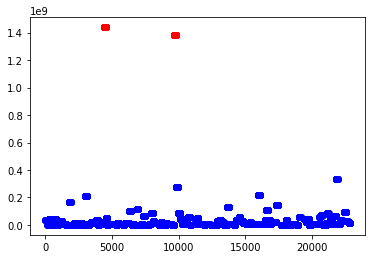

In [50]:
import matplotlib.pyplot as plt

# Calculate the z-scores of the data
z = (data['population'] - data['population'].mean()) / data['population'].std()

# Create a scatter plot of the data
plt.scatter(data.index, data['population'], c='blue', alpha=0.5, zorder=1)

# Add the outliers to the plot in red
outliers = data[z.abs() > 3]
plt.scatter(outliers.index, outliers['population'], c='red', alpha=1, zorder=2)

# Show the plot
plt.show()


Another way to visualize outliers is by using the lof LocalOutlierFactor algorithm which is an unsupervised algorithm that can be used to detect outliers in a dataset.

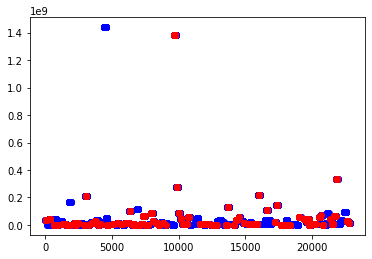

In [54]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(data[num_cols])
outliers = data[y_pred == -1]

# Create a scatter plot of the data
plt.scatter(data.index, data['population'], c='blue', alpha=0.5, zorder=1)

plt.scatter(outliers.index, outliers['population'], c='red', alpha=1, zorder=2)

# Show the plot
plt.show()

# CREATING NEW FEATURES

<b>1. Relevance</b>: Let's say you are working with a dataset that contains information about houses, and you want to predict the sale price of a house. A new feature that you might create to add relevance to the dataset could be the total square footage of the house:

In [55]:
    # # Creating a new feature 'total_sqft' 
    # df['total_sqft'] = df['first_floor_sqft'] + df['second_floor_sqft'] + df['basement_sqft']


<b>2. Linearity</b>: Let's say you are working with a dataset that contains information about car prices and you want to predict the price of a car. A new feature that you might create to add linearity to the dataset could be the age of the car. A car's age is likely to be linearly related to its price.

In [56]:
# # Creating a new feature 'car_age' 
# df['car_age'] = datetime.now().year - df['year_of_manufacture']

<b>3. Independence</b>: Let's say you are working with a dataset that contains information about customer demographics and you want to predict which customers are likely to churn. A new feature that you might create to add independence to the dataset could be the ratio of salary to expenses:

In [57]:
    # # Creating a new feature 'income_to_expense'
    # df['income_to_expense'] = df['salary'] / df['expenses']


<b>4. Sparsity</b>: Let's say you are working with a dataset that contains information about products and you want to predict which products are likely to be in high demand. A new feature that you might create to handle sparsity could be the average number of customer reviews per product:

In [58]:
    # # Creating a new feature 'avg_reviews'
    # df['avg_reviews'] = df.groupby('product_name')['reviews'].transform('mean')


<b>5. Uniqueness</b>: Let's say you are working with a dataset that contains information about job applicants and you want to predict which applicants are likely to be hired. A new feature that you might create to add uniqueness to the dataset could be the ratio of skills to years of experience:

In [59]:
    # # Creating a new feature 'skills_to_experience'
    # df['skills_to_experience'] = df['number_of_skills'] / df['years_of_experience']


<b>6. Domain Knowledge</b>: Let's say you are working with a dataset that contains information about weather, and you want to predict the temperature. A new feature that you might create to add domain knowledge to the dataset could be the time of day:

In [60]:
    # # Creating a new feature 'time_of_day'
    # df['time_of_day'] = df['time'].apply(lambda x: 'Morning' if x.hour <= 12 else 'Afternoon' if x.hour <= 18 else 'Evening' )


# FEATURE ENGINEERING

<b>1. Creating new features from existing ones</b>: You can create new features from existing ones by applying mathematical operations or custom functions. For example, you can create a new feature that represents the ratio of two other features, or a feature that represents the square of another feature.

In [61]:
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'feature1': [1, 2, 3], 'feature2': [4, 5, 6]})

# Create a new feature 'ratio' by dividing feature1 by feature2
df['ratio'] = df['feature1'] / df['feature2']

# Create a new feature 'square' by taking the square of feature1
df['square'] = df['feature1'] ** 2

<b>2. One-hot encoding</b>: One-hot encoding is a technique used to convert categorical variables into numerical ones by creating a new binary feature for each unique category.

In [62]:
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'color': ['red', 'green', 'blue']})

# One-hot encode the 'color' feature
one_hot = pd.get_dummies(df['color'])

# Add the one-hot encoded features to the original dataframe
df = pd.concat([df, one_hot], axis=1)

<b>3. Binning</b>: Binning is a technique used to group a set of continuous values into a smaller number of discrete "bins".

In [63]:
import pandas as pd

# Create a sample dataframe
df = pd.DataFrame({'age': [10, 20, 30, 40, 50]})

# Create bins for the 'age' feature
bins = [0, 25, 50, 75, 100]

# Add a new feature 'age_bin' to the dataframe by binning the 'age' feature
df['age_bin'] = pd.cut(df['age'], bins)

<b>4. Scaling</b>: Scaling is a technique used to standardize the range of independent variables or features of data.

In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a sample dataframe
df = pd.DataFrame({'age': [10, 20, 30, 40, 50],'income': [1000, 2000, 3000, 4000, 5000]})

# Scale the feature using MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
df = pd.DataFrame(scaled_values, columns=['age','income'])

<b>5. Encoding</b>: Encoding is a technique used to convert categorical variables into numerical ones by encoding each category as an integer.

In [65]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a sample dataframe
df = pd.DataFrame({'color': ['red', 'green', 'blue']})

# Encode the 'color' feature
encoder = LabelEncoder()
df['color'] = encoder.fit_transform(df)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
df

,color
0,2
1,1
2,0


# FEATURE ENGINEERING FOR TIME SERIES

Here are a few feature engineering tricks that can be used to improve forecasting models:

<b>1. Lag features</b>: Creating lagged features can help capture past trends in the data. For example, if you're trying to predict the next day's temperature, you can create a feature that represents the temperature from the day before.

<b>2. Rolling window statistics</b>: Creating rolling window statistics can help capture patterns in the data that change over time. For example, if you're trying to predict a stock's price, you can create a feature that represents the average price over the last 10 days.

<b>3. Fourier Transform</b>: Fourier Transform can be used to extract periodic patterns in the data, such as daily or weekly patterns. This can be useful when trying to predict time series data, such as stock prices or weather data.

<b>4. Categorical encoding</b>: Categorical variables can be transformed into numerical variables by using techniques such as one-hot encoding, dummy encoding, or ordinal encoding.

<b>5. Feature interactions</b>: Creating interaction features can help capture the relationship between different features. For example, if you're trying to predict the price of a house, you can create a feature that represents the interaction between the size of the house and the number of bedrooms.

In [67]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder

# # Load the data
# df = pd.read_csv("data.csv")

# # Create lagged features
# df['temp_lag'] = df['temp'].shift(1)

# # Create rolling window statistics
# df['temp_rolling_mean'] = df['temp'].rolling(window=10).mean()
# df['temp_rolling_std'] = df['temp'].rolling(window=10).std()

# # Fourier Transform
# df['temp_sin'] = np.sin(2 * np.pi * df.index / 24)
# df['temp_cos'] = np.cos(2 * np.pi * df.index / 24)

# # Categorical encoding
# le = LabelEncoder()
# df['day_of_week'] = le.fit_transform(df['day_of_week'])

# # Feature interactions
# df['temp_x_humidity'] = df['temp'] * df['humidity']

# Embeddings

In [69]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a toy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

# Define the neural network
class RNNNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNNet, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1, nonlinearity='relu')
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x, _ = self.rnn(x.view(1, x.size(0), x.size(1)))
        x = self.fc(x[-1])
        return x

# Initialize the model, loss function, and optimizer
model = RNNNet(input_size=20, hidden_size=10, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

# Create a data loader for the dataset
dataset = TensorDataset(X, y)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Train the model
for epoch in range(10):
    for data, label in data_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

# Extract the embeddings from the trained model
embeddings = model(X).detach().numpy()

# Train a gradient boosting machine on the embeddings
gbm = GradientBoostingClassifier()
gbm.fit(embeddings, y)

# Evaluate the performance of the gradient boosting machine
y_pred = gbm.predict(embeddings)
print(accuracy_score(y, y_pred))

0.968


In [70]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Create a toy dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2)
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()

# Define the neural network
class EmbeddingNet(nn.Module):
    def __init__(self):
        super(EmbeddingNet, self).__init__()
        self.fc = nn.Linear(20, 10)

    def forward(self, x):
        x = self.fc(x)
        return x

# Initialize the model, loss function, and optimizer
model = EmbeddingNet()
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

# Create a data loader for the dataset
data_loader = DataLoader(list(zip(X, y)), batch_size=64, shuffle=True)

# Train the model
for epoch in range(10):
    for data, label in data_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

# Extract the embeddings from the trained model
embeddings = model(X).detach().numpy()

# Train a gradient boosting machine on the embeddings
gbm = GradientBoostingClassifier()
gbm.fit(embeddings, y)

# Evaluate the performance of the gradient boosting machine
y_pred = gbm.predict(embeddings)
print(accuracy_score(y, y_pred))

0.952
